<a href="https://colab.research.google.com/github/JMP-MO/Intro_to_data_science_and_ml/blob/main/Intro_to_DS_and_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Science & Machine Learning 3

## Intro to Machine Learning - Regression

### Learning Outcomes
In this notebook we will work through how to train a machine learning model using our preprocessed data.
1. How to load preprocessed data
2. How and why we split our data
3. Understand what overfitting and generalisation are in relation to machine learning.
4. How to convert data to numpy and why we do this.
5. Create a basic TensorFlow machine learning model architecture.
6. Experiment with some hyperparameters to train a machine learning model.
7. An understand of what loss is.
8. How to read a loss chart.
9. How to save a model.

### What is Machine Learning?

OK, its not this simple, in fact machine learning is hard! But there are some brilliant libraries now to help make it alot easier!

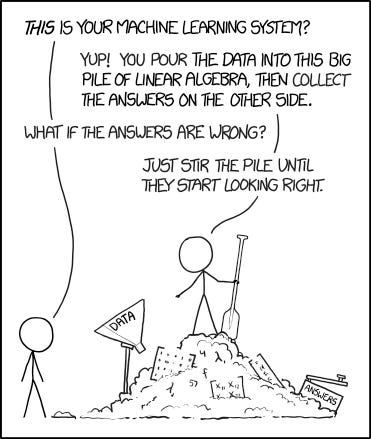

https://www.reddit.com/r/ProgrammerHumor/comments/p8llt1/or_make_a_machine_stir_it_for_you/

### What is the difference between regular programs and machine learning programs?
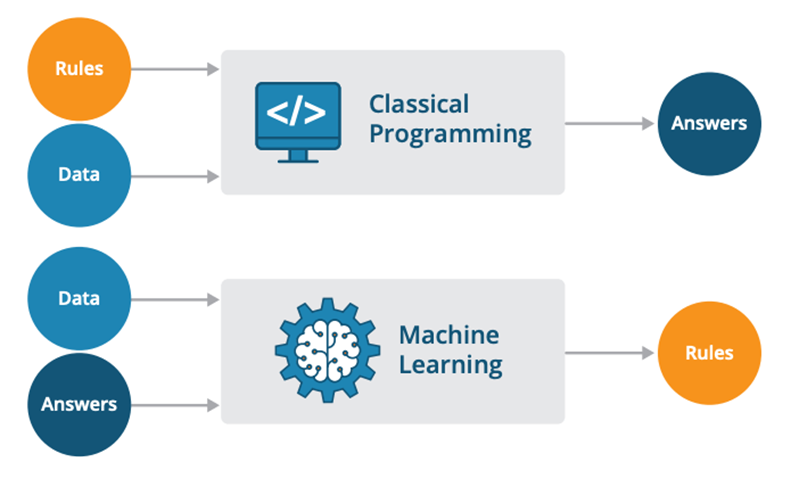

https://sravya-tech-usage.medium.com/traditional-programming-vs-machine-learning-e9bbed5e491c

There are many different types of machine learning. But essentially machine learning is used to develop a model (weights) that can be used to predict something. Machine learning is **predicting a number, with some other numbers** using an **algorithm that learns from data**.

**A machine learning project might look like this:**
1. Get data.
2. Preprocess data (missing values, outliers, scaling etc...)
3. Split your data (for training, validation and testing)
4. Train a ML model (run a training program on your split preprocessed training data). At this point you could save and distribute your model for others to use.

5. Inference - provide your model some new or testing data. It will use this to create predictions.
6. Evaluate - you might now evaluate the accuracy of your model predictions.
7. Use your model with new data!

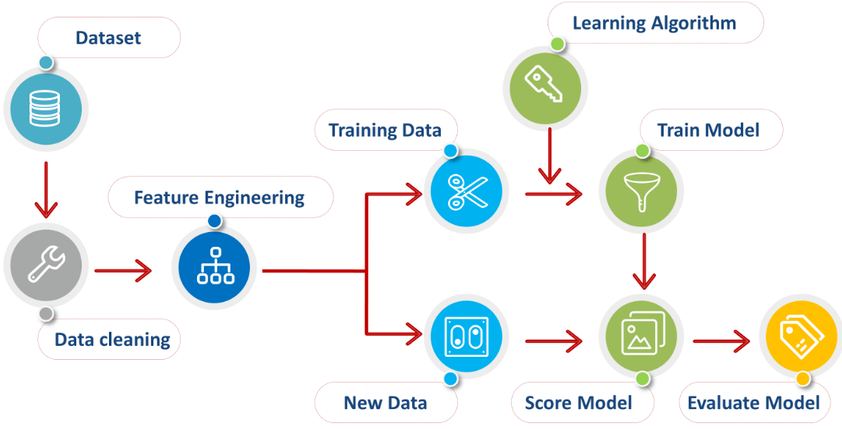

https://www.researchgate.net/figure/Fig-2-Machine-learning-process-diagram_fig2_373826952

<br>

**Some examples:**
* Take the current state of the atmosphere and predict it in 6 hours time, or a week.
* Take a sequence of words and predict the next sequence of words.
* Take a series of medical imaging images and predict which has a particular disease.
* Take a grainy low resolution image and convert to a high resolution image by predicting the missing pixel detail.

> **What other examples of machine learning can you think of?** <br>
> Think about input data and output predictions.

### Problem Statement

We want to use available data to predict tip amounts. This type of machine learning technique is called regression as we are trying to represent data trends with a model.

### Load your preprocessed data

TASK - Drag your 'tips_preprocessed.csv' file created and downloaded locally in the last notebook to the Google Colab 'files' area.

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("tips_preprocessed.csv")
data.head()

,total_bill,tip,size,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,0.249445,0.001111,0.2,1,0,0,0,1,0,1,0,1,0
1,0.101864,0.073333,0.4,0,1,0,0,1,0,1,0,1,0
2,0.338660,0.277778,0.4,0,1,0,0,1,0,1,0,1,0
3,0.397914,0.256667,0.2,0,1,0,0,1,0,1,0,1,0
4,0.418109,0.290000,0.6,1,0,0,0,1,0,1,0,1,0


### Random Seed

Machine learning features inherent randomness. We can attempt to control it by setting and using a random seed.

In [21]:
random_seed = 42

### Split your data - Features (X) and Targets (y)

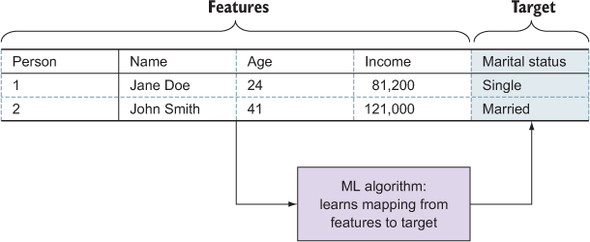

https://livebook.manning.com/concept/machine-learning/input-feature


<br>

We need to split our data. First we split the data we want to predict (target) from the data we wish to use to make the prediction.

Our goal is to predict the `tip` amount from the rest of the data.

* X is used to represent our input data and
* y is used to represent our target (what we want to predict)

In [22]:
target = "tip"

X = data.drop(target, axis=1)
y = data[target]

In [23]:
# Its useful to print the shape of your data to track how it changes.
print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (243, 12)
y Shape: (243,)


In [24]:
# Use previous techniques to check that X does not have the tip column and y should only have a tip column.





### Split your data - Train, Test, Split.


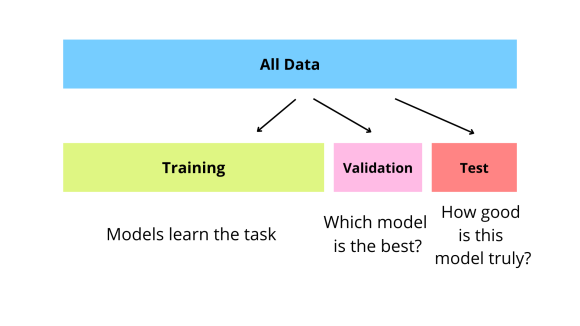

https://medium.com/@rahulchavan4894/understanding-train-test-and-validation-dataset-split-in-simple-quick-terms-5a8630fe58c8

Now we need to split the features (X) and target (y) data into different groups for training and testing. We can use the `sklearn` package to help with this.

We can set the `test_size` to determine how much % data we want in our training split, and how much to reserve for testing.

It is essential that the reserved test data **DOES NOT** get used for training.

#### Overfitting and Generalisation

> But why is it essential? Imagine you are going to take an exam, but I give you all the answers to the exam questions. You will probably ace the exam - but did you learn the general skills and knowledge, or did you just memorise the specific answers? This is the problem - when I then given you a real world task related to the exam you won't know how to **generalise** and do badly at the task. The same is true for ML models. They can **overfit** to the training data by learning it too well, giving you great training statistics, but when you try your model on unseen real world data it suddenly does very badly.  

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Lets check the shape of our data:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (194, 12)
X_test Shape: (49, 12)
y_train Shape: (194,)
y_test Shape: (49,)


In [27]:
# Look at the data shapes. Do they make sense? Can you explain them?
# If not, try using data exploration techniques to explore the different data splits.

### Convert data to numpy

Machine learning frameworks like TensorFlow and PyTorch do not work with pandas dataframes. Therefore we need to convert the pandas dataframes to numpy arrays.
> This will retain the data structure and values, but we will loose the pandas meta data such as the column header names.

In [28]:
import numpy as np

In [29]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Import TensorFlow
TensorFlow is a machine learning framework to make training ML models easier and quicker. An alternitive is PyTorch, however as TensorFlow is a little quicker to get experiments running, we will use that.

### Define a machine learning model architecture

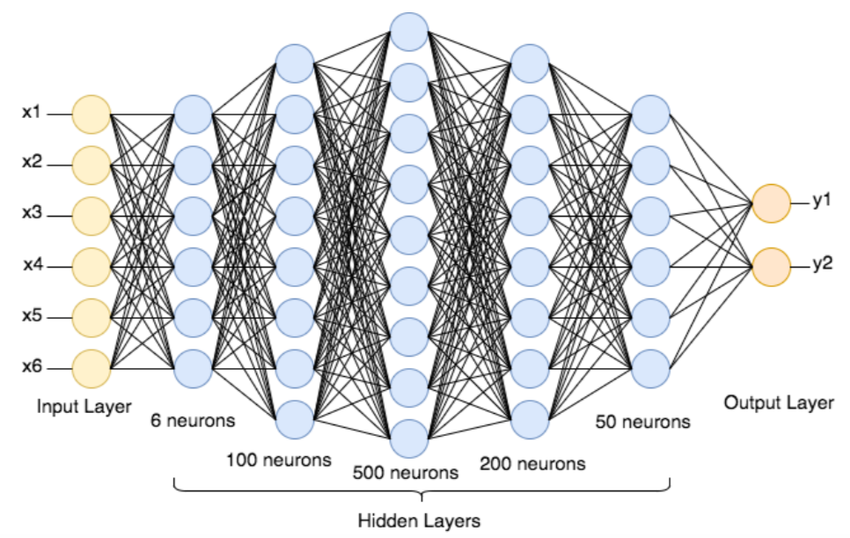

https://www.researchgate.net/figure/Deep-Neural-Network-architecture_fig1_330120030

<br>

This is a really fun, experimental part of ML. Designing the model architecture. We can add layers in a sequential order.

Each layer requires:
* number of units (neurons),
* activation function (introduces non-linearity - where the magic happens!)

You will want to experiment with different amounts of layers, depth of layers, activation functions etc. to see what architecture creates the most accurate model.


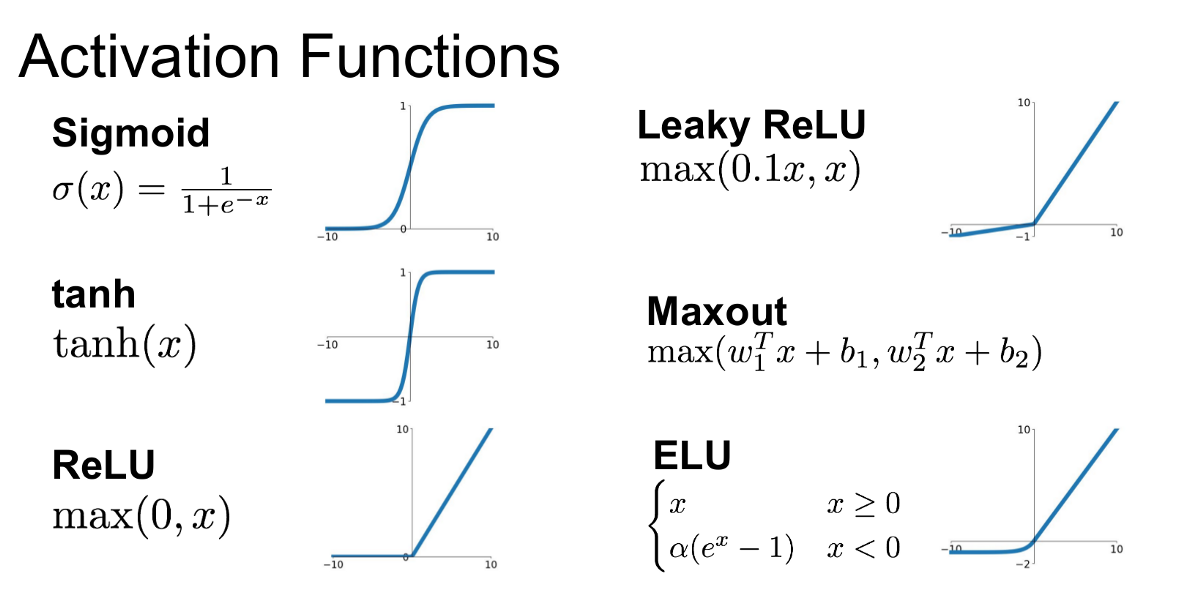

https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092

### Design my first Machine Learning model architecture

In [30]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [35]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # single output for regression
])

### Compile the model

Define options for training:
* optimizer - how the model tries to improve.
* loss - how we measure how well the model training is improving.
* metrics used to evaluate the loss.

What these are could take days to explain, feel free to research them if interested. Lots of effort goes into building more effecent optimizers and more accuracte loss functions.

In [36]:
model.compile(
    optimizer='adam',    # Adaptive Moment Estimation
    loss='mse',          # Mean Squared Error
    metrics=['mse']
)

### Train the model

Setting the epochs and batch_size are powerful hyperparameters that control the training run.
* Validation_split is useful to test the model each epoch to check how good it performs on unseen data - this is helpful to understands how your model will generalise to new data.

In [37]:
%%time

history = model.fit(
    X_train,                # input data
    y_train,                # target data
    validation_split=0.2,   # hold some training data to measure training improvement.
    epochs=50,              # how many times we should loop over the training data
    batch_size=32,          # how many data points / samples should loss be calculated on.
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.3561 - mse: 0.3561 - val_loss: 0.4448 - val_mse: 0.4448
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2857 - mse: 0.2857 - val_loss: 0.3548 - val_mse: 0.3548
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2133 - mse: 0.2133 - val_loss: 0.2842 - val_mse: 0.2842
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1323 - mse: 0.1323 - val_loss: 0.2327 - val_mse: 0.2327
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1171 - mse: 0.1171 - val_loss: 0.1963 - val_mse: 0.1963
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0974 - mse: 0.0974 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0697 - mse: 0.0697 - val_loss: 0.1526 - val_mse: 0.1526
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0692 - mse: 0.0692 - val_loss: 0.1372 - val_mse: 0.1372
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0674 - mse: 0.0674 - 

### What is loss?

Loss is a measurement between the predicted value and the actual value. Sometimes we square this error to exaggerate and penalise larger errors more. The images on the bottom also demonstrates the difference between linear functions and non-linear functions which can be predicted using the non-linear activation functions like `relu`. Ultimately the goal of our model is to find a representation of the data with the lowest loss on unseen data (generalisation). This is how the 'machine learns'.
1. Start with random model weights
2. Make predictions
3. Calculate how wrong they are (loss)
4. Adjust the weights using an optimizer
5. Repeat

Think back to the meme at the top of this notebook about stiring data until it looks right. Can you see now why its a fun interpretation of machine learning?

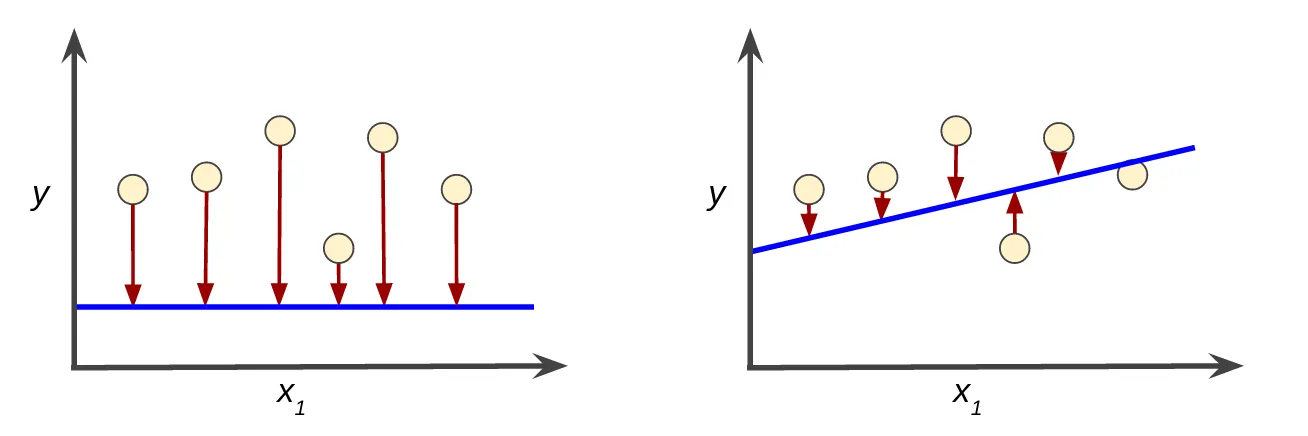

https://wiki.cloudfactory.com/docs/mp-wiki/loss/comprehensive-overview-of-loss-functions-in-machine-learning

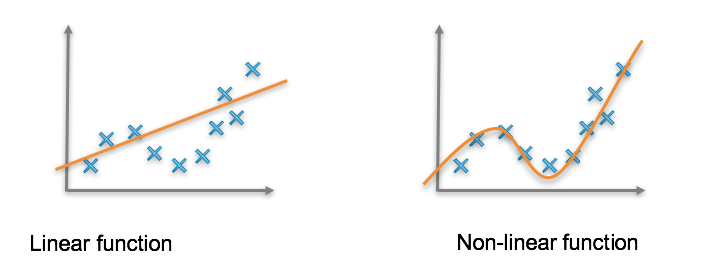

### Plot the training loss

We can plot the training loss to work out how well our training progressed. Over time you learn how to read these plots. The goal is that our model doesn't just fit to the training data, but can also fit well to the validation data meaning it can generalise to unseen data which is the ultimate goal of our model. If the training loss is much lower than validation it means our model is `overfitting` to the training data. This might mean our model architecture is too complex for the data. If the line hasn't leveled out the model is still learning. If the line is jumpy the data could be too noise or the batch size not appropriate.

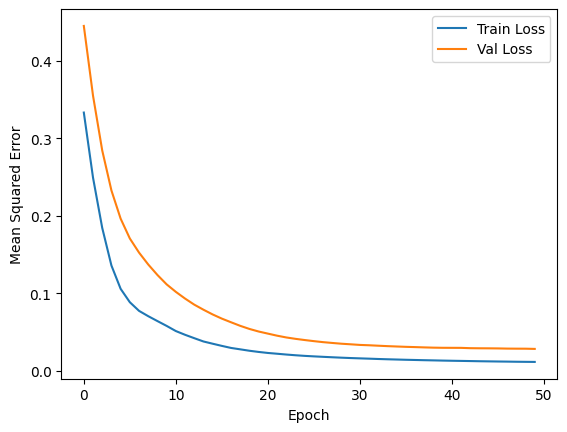

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Experiment
Our first attempt yeilded a Validation Mean Squared Error Loss of about 0.35, can you do better?
> Think - why are we measuring validation loss, not training loss?

**TASK: Go back and try changing the model architecture. Try:**
* adding more layers,
* and/or more units per layer.
* try different activation functions like tahn.
* another common optimizer is SGD.
> * keep the loss and metrics the same so you can compare.  
> * Keep in mind if you change too many things you won't know what parameter had an effect.
> * look up the TensorFlow docs to research how to impliment things.

_**Re-run all the cells from the model architecture to here - its important to redefine the model**_

### Evaluate on the test data

Remember we split off some test data that the model hasn't seen during training? Now we can use it to evaluate and test our model. Remember if the model had trained on the test data our prediction results would probably look great, but when we then tried it on actual unseen data, we might find our model is not any where near as good as we think it is.

In [39]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0109 - mse: 0.0109
Test MAE: 0.01


### Make predictions

Lets also use our `X_test` data to make some predictions. We can also imagine this is new data (remember we should not have used this at any point in training the model).

First we make `predictions` using `model.predict()` and passing data in the same shape as it was trained on.

The code below loops through 5 true values (`y_test`) and predicted values (`predictions`)


In [40]:
predictions = model.predict(X_test)

# Compare first few predictions
for true, pred in zip(y_test[:5], predictions[:5]):
    print(f"True: {true:.2f}, Predicted: {pred[0]:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
True: 0.24, Predicted: 0.28
True: 0.11, Predicted: 0.15
True: 0.11, Predicted: 0.31
True: 0.05, Predicted: 0.17
True: 0.55, Predicted: 0.39


You can see the model makes predictions which are roughly following the trend.

**TASK - discuss what is limiting our model from being better?** <br>
**TASK - discuss what we could do to make our model more accurate?**

### Save your model
Remember to download it from Google Colab

In [ ]:
model.save("tip_predictor_model")

In [ ]:
# We can load it later like this:

tf.keras.models.load_model("tip_predictor_model")